In [2]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mdef mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, resultsp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connectionslandmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

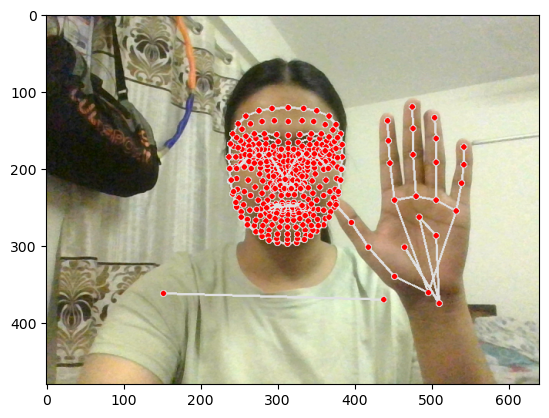

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
len(results.left_hand_landmarks.landmark)


21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

        

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.48457709,  0.44753507, -1.0504849 , ...,  0.        ,
        0.        ,  0.        ])

In [20]:
468*3+33*4+21*3+21*3

1662

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.48457709,  0.44753507, -1.0504849 , ...,  0.        ,
        0.        ,  0.        ])

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [24]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [25]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(90, 30, 1662)

In [33]:
np.array(labels).shape

(90,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(90, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [38]:
y_test.shape

(5, 3)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000


3/3 [==============================] - 9s 91ms/step - loss: 11.3271 - categorical_accuracy: 0.2824
Epoch 2/2000
3/3 [==============================] - 0s 68ms/step - loss: 12.5779 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.5924 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 101ms/step - loss: 9.2959 - categorical_accuracy: 0.4235
Epoch 5/2000
3/3 [==============================] - 0s 92ms/step - loss: 4.8611 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 0s 92ms/step - loss: 7.3409 - categorical_accuracy: 0.4588
Epoch 7/2000
3/3 [==============================] - 0s 90ms/step - loss: 7.4205 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.3163 - categorical_accuracy: 0.4118
Epoch 9/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.1554 - categorical_accuracy: 0.4

3/3 [==============================] - 0s 87ms/step - loss: 0.4984 - categorical_accuracy: 0.7529
Epoch 70/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.4954 - categorical_accuracy: 0.7765
Epoch 71/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5104 - categorical_accuracy: 0.8471
Epoch 72/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.4779 - categorical_accuracy: 0.7529
Epoch 73/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.4457 - categorical_accuracy: 0.7765
Epoch 74/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4497 - categorical_accuracy: 0.7529
Epoch 75/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.4428 - categorical_accuracy: 0.7529
Epoch 76/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.4426 - categorical_accuracy: 0.7765
Epoch 77/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.5066 - categorical_accuracy: 0.7647
Epoch 

3/3 [==============================] - 0s 90ms/step - loss: 0.4656 - categorical_accuracy: 0.8118
Epoch 142/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4838 - categorical_accuracy: 0.7294
Epoch 143/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.4490 - categorical_accuracy: 0.8353
Epoch 144/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.4320 - categorical_accuracy: 0.8471
Epoch 145/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.4389 - categorical_accuracy: 0.8706
Epoch 146/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.4155 - categorical_accuracy: 0.8588
Epoch 147/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4040 - categorical_accuracy: 0.8353
Epoch 148/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.4141 - categorical_accuracy: 0.8353
Epoch 149/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.4349 - categorical_accuracy: 0.823

3/3 [==============================] - 0s 96ms/step - loss: 0.2673 - categorical_accuracy: 0.9176
Epoch 214/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.2595 - categorical_accuracy: 0.9059
Epoch 215/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2600 - categorical_accuracy: 0.9294
Epoch 216/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2859 - categorical_accuracy: 0.9059
Epoch 217/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.2945 - categorical_accuracy: 0.9059
Epoch 218/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2729 - categorical_accuracy: 0.9059
Epoch 219/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.2619 - categorical_accuracy: 0.9294
Epoch 220/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2552 - categorical_accuracy: 0.9176
Epoch 221/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2464 - categorical_accuracy: 0.

Epoch 285/2000
3/3 [==============================] - 0s 87ms/step - loss: 10.3738 - categorical_accuracy: 0.3294
Epoch 286/2000
3/3 [==============================] - 0s 86ms/step - loss: 6.4308 - categorical_accuracy: 0.3765
Epoch 287/2000
3/3 [==============================] - 0s 86ms/step - loss: 5.6367 - categorical_accuracy: 0.3647
Epoch 288/2000
3/3 [==============================] - 0s 89ms/step - loss: 8.6691 - categorical_accuracy: 0.3647
Epoch 289/2000
3/3 [==============================] - 0s 83ms/step - loss: 6.4671 - categorical_accuracy: 0.3294
Epoch 290/2000
3/3 [==============================] - 0s 90ms/step - loss: 5.9922 - categorical_accuracy: 0.2471
Epoch 291/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.0202 - categorical_accuracy: 0.4118
Epoch 292/2000
3/3 [==============================] - 0s 85ms/step - loss: 7.6361 - categorical_accuracy: 0.3059
Epoch 293/2000
3/3 [==============================] - 0s 91ms/step - loss: 5.4921 - categorical

3/3 [==============================] - 0s 85ms/step - loss: 2.2882 - categorical_accuracy: 0.2588
Epoch 358/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.7284 - categorical_accuracy: 0.3059
Epoch 359/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.1769 - categorical_accuracy: 0.4000
Epoch 360/2000
3/3 [==============================] - 0s 71ms/step - loss: 2.0379 - categorical_accuracy: 0.2941
Epoch 361/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.0603 - categorical_accuracy: 0.3647
Epoch 362/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.1745 - categorical_accuracy: 0.3647
Epoch 363/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.7985 - categorical_accuracy: 0.2941
Epoch 364/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.3237 - categorical_accuracy: 0.3059
Epoch 365/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.9375 - categorical_accuracy: 0.36

3/3 [==============================] - 0s 82ms/step - loss: 2.2362 - categorical_accuracy: 0.3176
Epoch 430/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.0570 - categorical_accuracy: 0.3529
Epoch 431/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.2395 - categorical_accuracy: 0.3176
Epoch 432/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.8613 - categorical_accuracy: 0.4353
Epoch 433/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.3285 - categorical_accuracy: 0.3412
Epoch 434/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.0502 - categorical_accuracy: 0.2941
Epoch 435/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.1224 - categorical_accuracy: 0.2824
Epoch 436/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.0525 - categorical_accuracy: 0.4118
Epoch 437/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.4506 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 81ms/step - loss: 1.6691 - categorical_accuracy: 0.3294
Epoch 502/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.0561 - categorical_accuracy: 0.3412
Epoch 503/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.5117 - categorical_accuracy: 0.2000
Epoch 504/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.2823 - categorical_accuracy: 0.3176
Epoch 505/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.3710 - categorical_accuracy: 0.3412
Epoch 506/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.8984 - categorical_accuracy: 0.3059
Epoch 507/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.4868 - categorical_accuracy: 0.2824
Epoch 508/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.4835 - categorical_accuracy: 0.4471
Epoch 509/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.6622 - categorical_accuracy: 0.2

3/3 [==============================] - 0s 92ms/step - loss: 1.7148 - categorical_accuracy: 0.2588
Epoch 574/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1442 - categorical_accuracy: 0.3765
Epoch 575/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.1993 - categorical_accuracy: 0.3765
Epoch 576/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.5907 - categorical_accuracy: 0.3059
Epoch 577/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.2547 - categorical_accuracy: 0.3176
Epoch 578/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.3006 - categorical_accuracy: 0.3176
Epoch 579/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.3832 - categorical_accuracy: 0.2824
Epoch 580/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.2013 - categorical_accuracy: 0.2941
Epoch 581/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.2376 - categorical_accuracy: 0

3/3 [==============================] - 0s 122ms/step - loss: 1.6276 - categorical_accuracy: 0.3176
Epoch 646/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.8097 - categorical_accuracy: 0.2941
Epoch 647/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.3909 - categorical_accuracy: 0.3529
Epoch 648/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.4196 - categorical_accuracy: 0.2941
Epoch 649/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.6163 - categorical_accuracy: 0.3059
Epoch 650/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.3216 - categorical_accuracy: 0.3412
Epoch 651/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.4409 - categorical_accuracy: 0.2824
Epoch 652/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.2998 - categorical_accuracy: 0.2706
Epoch 653/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.3509 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 90ms/step - loss: 1.3998 - categorical_accuracy: 0.2941
Epoch 718/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.3697 - categorical_accuracy: 0.3765
Epoch 719/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5693 - categorical_accuracy: 0.3059
Epoch 720/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.4235 - categorical_accuracy: 0.3647
Epoch 721/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.3368 - categorical_accuracy: 0.3647
Epoch 722/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2660 - categorical_accuracy: 0.4000
Epoch 723/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.2003 - categorical_accuracy: 0.3765
Epoch 724/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.3586 - categorical_accuracy: 0.3059
Epoch 725/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1381 - categorical_accuracy: 0.376

3/3 [==============================] - 0s 97ms/step - loss: 1.7494 - categorical_accuracy: 0.3059
Epoch 790/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.4762 - categorical_accuracy: 0.3529
Epoch 791/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.7099 - categorical_accuracy: 0.2588
Epoch 792/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.8830 - categorical_accuracy: 0.2941
Epoch 793/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.0279 - categorical_accuracy: 0.3529
Epoch 794/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.9874 - categorical_accuracy: 0.2941
Epoch 795/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.6156 - categorical_accuracy: 0.3529
Epoch 796/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.4387 - categorical_accuracy: 0.3176
Epoch 797/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.7024 - categorical_accuracy: 0.388

3/3 [==============================] - 0s 92ms/step - loss: 1.3476 - categorical_accuracy: 0.3882
Epoch 862/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.6108 - categorical_accuracy: 0.2941
Epoch 863/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.4536 - categorical_accuracy: 0.3647
Epoch 864/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.3472 - categorical_accuracy: 0.2706
Epoch 865/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2991 - categorical_accuracy: 0.3529
Epoch 866/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.5168 - categorical_accuracy: 0.3529
Epoch 867/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.9597 - categorical_accuracy: 0.3176
Epoch 868/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.8886 - categorical_accuracy: 0.3176
Epoch 869/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.8210 - categorical_accuracy: 0

3/3 [==============================] - 0s 101ms/step - loss: 1.5557 - categorical_accuracy: 0.3647
Epoch 934/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.5284 - categorical_accuracy: 0.3176
Epoch 935/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.2968 - categorical_accuracy: 0.3529
Epoch 936/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.3897 - categorical_accuracy: 0.3529
Epoch 937/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.4929 - categorical_accuracy: 0.2941
Epoch 938/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.3409 - categorical_accuracy: 0.2941
Epoch 939/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.2961 - categorical_accuracy: 0.3529
Epoch 940/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.3040 - categorical_accuracy: 0.3176
Epoch 941/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.4245 - categorical_accuracy: 0.30

3/3 [==============================] - 0s 98ms/step - loss: 1.1765 - categorical_accuracy: 0.4118
Epoch 1006/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.5070 - categorical_accuracy: 0.4000
Epoch 1007/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.4241 - categorical_accuracy: 0.3059
Epoch 1008/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.2588 - categorical_accuracy: 0.3647
Epoch 1009/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.6472 - categorical_accuracy: 0.2471
Epoch 1010/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.5134 - categorical_accuracy: 0.3294
Epoch 1011/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.4976 - categorical_accuracy: 0.2588
Epoch 1012/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.4703 - categorical_accuracy: 0.3176
Epoch 1013/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.2069 - categorical

3/3 [==============================] - 0s 95ms/step - loss: 1.2338 - categorical_accuracy: 0.3176
Epoch 1077/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.2703 - categorical_accuracy: 0.3412
Epoch 1078/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.2855 - categorical_accuracy: 0.3412
Epoch 1079/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.3389 - categorical_accuracy: 0.2824
Epoch 1080/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.2431 - categorical_accuracy: 0.3647
Epoch 1081/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.2688 - categorical_accuracy: 0.3412
Epoch 1082/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.2955 - categorical_accuracy: 0.3529
Epoch 1083/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.4124 - categorical_accuracy: 0.3529
Epoch 1084/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.4422 - categorical_accurac

Epoch 1148/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.2567 - categorical_accuracy: 0.3529
Epoch 1149/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.2373 - categorical_accuracy: 0.3882
Epoch 1150/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.3226 - categorical_accuracy: 0.3412
Epoch 1151/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2164 - categorical_accuracy: 0.3529
Epoch 1152/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3813 - categorical_accuracy: 0.3176
Epoch 1153/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.1291 - categorical_accuracy: 0.3765
Epoch 1154/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2272 - categorical_accuracy: 0.3059
Epoch 1155/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.2162 - categorical_accuracy: 0.3529
Epoch 1156/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.2369 - cat

3/3 [==============================] - 0s 87ms/step - loss: 1.2565 - categorical_accuracy: 0.3412
Epoch 1220/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.2299 - categorical_accuracy: 0.3176
Epoch 1221/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.3072 - categorical_accuracy: 0.3412
Epoch 1222/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.4273 - categorical_accuracy: 0.3647
Epoch 1223/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.4002 - categorical_accuracy: 0.4118
Epoch 1224/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.6264 - categorical_accuracy: 0.3412
Epoch 1225/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.7485 - categorical_accuracy: 0.3294
Epoch 1226/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.6069 - categorical_accuracy: 0.2824
Epoch 1227/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.5181 - categorical_accura

3/3 [==============================] - 0s 83ms/step - loss: 1.1149 - categorical_accuracy: 0.3176
Epoch 1291/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.1168 - categorical_accuracy: 0.3059
Epoch 1292/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1033 - categorical_accuracy: 0.3882
Epoch 1293/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.1427 - categorical_accuracy: 0.3294
Epoch 1294/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1754 - categorical_accuracy: 0.3412
Epoch 1295/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1565 - categorical_accuracy: 0.4000
Epoch 1296/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.3341 - categorical_accuracy: 0.4235
Epoch 1297/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.2730 - categorical_accuracy: 0.3059
Epoch 1298/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.2641 - categorical_accurac

3/3 [==============================] - 0s 85ms/step - loss: 1.1332 - categorical_accuracy: 0.3529
Epoch 1363/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.1552 - categorical_accuracy: 0.4000
Epoch 1364/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.2803 - categorical_accuracy: 0.2353
Epoch 1365/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.2438 - categorical_accuracy: 0.4706
Epoch 1366/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.3458 - categorical_accuracy: 0.3176
Epoch 1367/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.3766 - categorical_accuracy: 0.3647
Epoch 1368/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.6130 - categorical_accuracy: 0.3529
Epoch 1369/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.5071 - categorical_accuracy: 0.3647
Epoch 1370/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.2733 - categorical_accurac

Epoch 1434/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.3226 - categorical_accuracy: 0.3882
Epoch 1435/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2784 - categorical_accuracy: 0.3176
Epoch 1436/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.2113 - categorical_accuracy: 0.3882
Epoch 1437/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.1437 - categorical_accuracy: 0.4471
Epoch 1438/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.2107 - categorical_accuracy: 0.2706
Epoch 1439/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0664 - categorical_accuracy: 0.4471
Epoch 1440/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0393 - categorical_accuracy: 0.4471
Epoch 1441/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0908 - categorical_accuracy: 0.3765
Epoch 1442/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0594 - cat

3/3 [==============================] - 0s 94ms/step - loss: 1.1268 - categorical_accuracy: 0.3765
Epoch 1506/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.2069 - categorical_accuracy: 0.3176
Epoch 1507/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1543 - categorical_accuracy: 0.2706
Epoch 1508/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.1542 - categorical_accuracy: 0.3176
Epoch 1509/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1249 - categorical_accuracy: 0.3176
Epoch 1510/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.1080 - categorical_accuracy: 0.3294
Epoch 1511/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1417 - categorical_accuracy: 0.3059
Epoch 1512/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.1788 - categorical_accuracy: 0.2588
Epoch 1513/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1165 - categorical_accurac

3/3 [==============================] - 0s 94ms/step - loss: 1.1449 - categorical_accuracy: 0.3529
Epoch 1577/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.1242 - categorical_accuracy: 0.3647
Epoch 1578/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.1823 - categorical_accuracy: 0.2353
Epoch 1579/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.1719 - categorical_accuracy: 0.3294
Epoch 1580/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1682 - categorical_accuracy: 0.3294
Epoch 1581/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.1777 - categorical_accuracy: 0.3294
Epoch 1582/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.1570 - categorical_accuracy: 0.2941
Epoch 1583/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1136 - categorical_accuracy: 0.3294
Epoch 1584/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1310 - categorical_accurac

Epoch 1648/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0565 - categorical_accuracy: 0.3765
Epoch 1649/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0644 - categorical_accuracy: 0.3647
Epoch 1650/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0544 - categorical_accuracy: 0.3882
Epoch 1651/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0571 - categorical_accuracy: 0.3412
Epoch 1652/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0513 - categorical_accuracy: 0.4471
Epoch 1653/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0553 - categorical_accuracy: 0.3765
Epoch 1654/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0416 - categorical_accuracy: 0.4118
Epoch 1655/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0406 - categorical_accuracy: 0.3882
Epoch 1656/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0272 - ca

3/3 [==============================] - 0s 89ms/step - loss: 0.6549 - categorical_accuracy: 0.7294
Epoch 1720/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.6463 - categorical_accuracy: 0.7294
Epoch 1721/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.6482 - categorical_accuracy: 0.7294
Epoch 1722/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.6438 - categorical_accuracy: 0.7294
Epoch 1723/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6413 - categorical_accuracy: 0.7294
Epoch 1724/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6416 - categorical_accuracy: 0.7294
Epoch 1725/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6390 - categorical_accuracy: 0.7294
Epoch 1726/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.6422 - categorical_accuracy: 0.7294
Epoch 1727/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6386 - categorical_accurac

3/3 [==============================] - 0s 88ms/step - loss: 0.5961 - categorical_accuracy: 0.7647
Epoch 1791/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.5918 - categorical_accuracy: 0.7529
Epoch 1792/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.6019 - categorical_accuracy: 0.7529
Epoch 1793/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.5942 - categorical_accuracy: 0.7529
Epoch 1794/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.5911 - categorical_accuracy: 0.7647
Epoch 1795/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.5957 - categorical_accuracy: 0.7529
Epoch 1796/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.6506 - categorical_accuracy: 0.7176
Epoch 1797/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.9404 - categorical_accuracy: 0.4235
Epoch 1798/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.6705 - categorical_accurac

3/3 [==============================] - 0s 94ms/step - loss: 0.5410 - categorical_accuracy: 0.7882
Epoch 1862/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.5372 - categorical_accuracy: 0.8000
Epoch 1863/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.5399 - categorical_accuracy: 0.8000
Epoch 1864/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.5437 - categorical_accuracy: 0.7882
Epoch 1865/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.5397 - categorical_accuracy: 0.8000
Epoch 1866/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.5376 - categorical_accuracy: 0.8000
Epoch 1867/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.5396 - categorical_accuracy: 0.7882
Epoch 1868/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.5355 - categorical_accuracy: 0.8000
Epoch 1869/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.5346 - categorical_accurac

3/3 [==============================] - 0s 95ms/step - loss: 0.4983 - categorical_accuracy: 0.8353
Epoch 1933/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4824 - categorical_accuracy: 0.8118
Epoch 1934/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.4711 - categorical_accuracy: 0.8235
Epoch 1935/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4921 - categorical_accuracy: 0.8353
Epoch 1936/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4811 - categorical_accuracy: 0.7765
Epoch 1937/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4807 - categorical_accuracy: 0.8000
Epoch 1938/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4753 - categorical_accuracy: 0.8353
Epoch 1939/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4869 - categorical_accuracy: 0.8235
Epoch 1940/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.4817 - categorical_accur

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [45]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [46]:
actions[np.argmax(res[4])]

'thanks'

In [47]:
actions[np.argmax(y_test[4])]

'thanks'

In [48]:
model.save('action.h5')

C:\Users\ramya\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
model.load_weights('action.h5')

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 4]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

1.0

In [55]:
from scipy import stats

In [56]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [63]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
        
        
        

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 23ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
ilov

1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.

1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe

1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'media

1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hell

1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<cla

1/1 [==============================] - 0s 35ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
iloveyo

1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 76ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 74ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 66ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>

1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 33ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
ilov

1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 72ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 89ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 64ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 72ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 56ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 80ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 41ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 52ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 46ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'me